In [36]:
!pip install tabulate

In [6]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tabulate import tabulate

credit = pd.read_csv("testcpns(1).csv")


In [28]:
credit.head(10)

,toefl,ipk,pengalaman_kerja,diterima
0,780,4.00,3,1
1,750,3.09,4,1
2,690,3.03,3,0
3,710,3.07,5,1
4,680,3.09,4,0
5,730,3.07,6,1
6,690,2.03,1,0
7,720,3.03,4,1
8,740,3.03,5,1
9,690,1.07,1,0


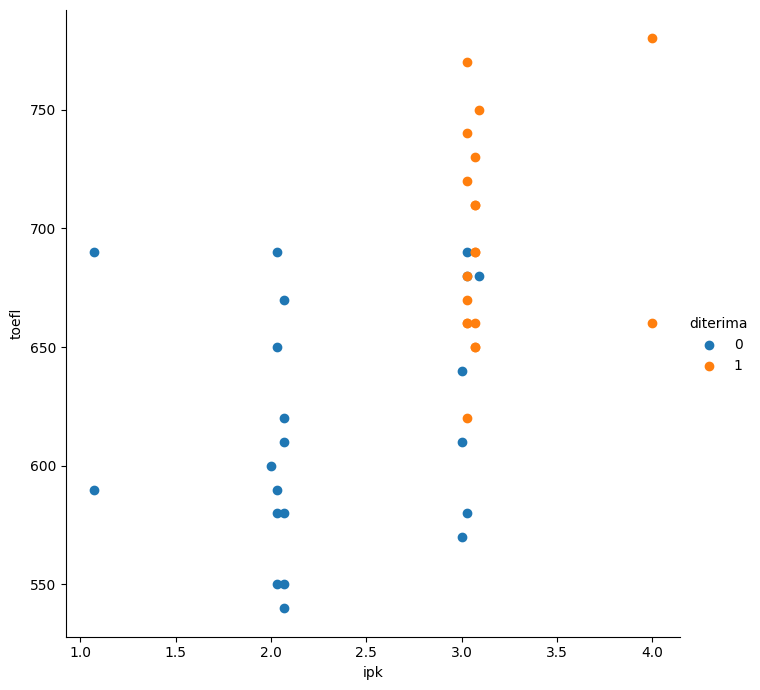

In [8]:
sns.FacetGrid(credit, hue="diterima", height=7) \
   .map(plt.scatter, "ipk", "toefl") \
   .add_legend()

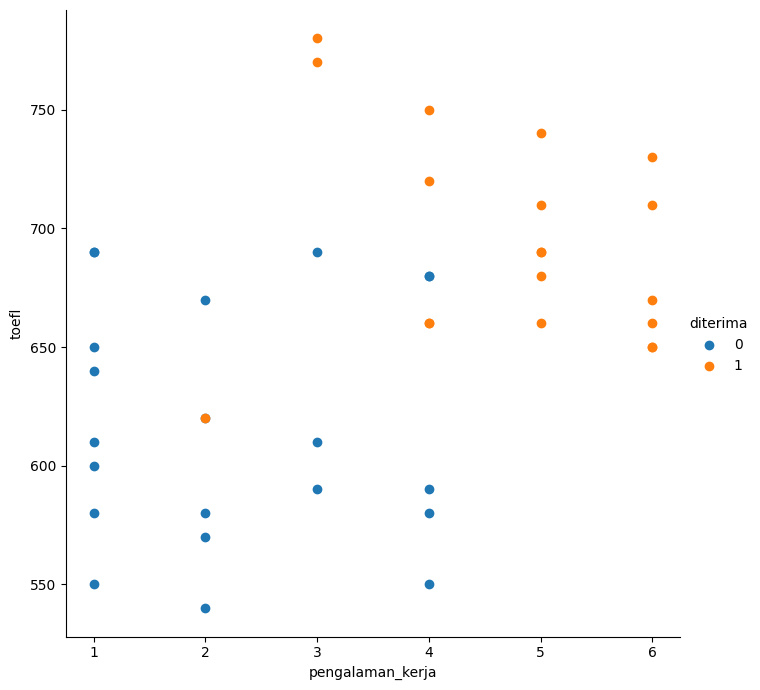

In [9]:
sns.FacetGrid(credit, hue="diterima", height=7) \
   .map(plt.scatter, "pengalaman_kerja", "toefl") \
   .add_legend()

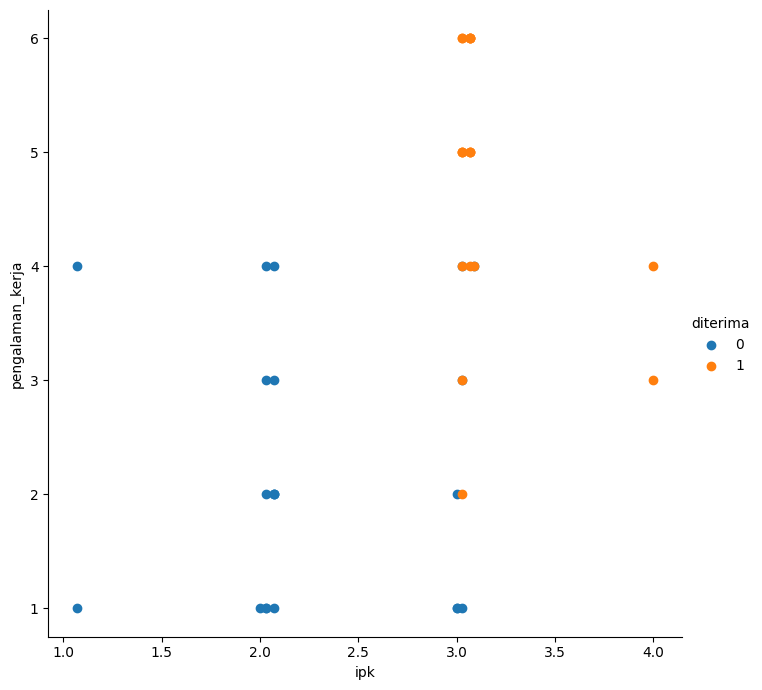

In [10]:
sns.FacetGrid(credit, hue="diterima", height=7) \
   .map(plt.scatter, "ipk", "pengalaman_kerja") \
   .add_legend()

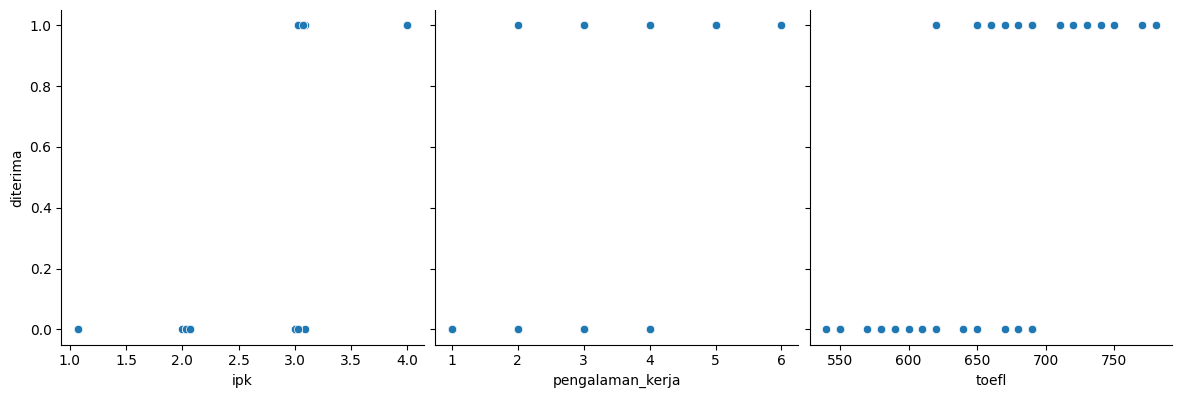

In [11]:
sns.pairplot(credit, x_vars=['ipk', 'pengalaman_kerja', 'toefl'], 
             y_vars='diterima', height=4, aspect=1, kind='scatter')
plt.show()

In [12]:
X = credit.iloc[:, :-1]
y = credit.iloc[:, -1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split (X, y,test_size=0.3, random_state=0)

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_pred = model.predict (X_test)
print(y_pred)

[0 0 1 1 0 0 1 1 1 1 0 0]


In [16]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix (y_test, y_pred)
cnf_matrix

array([[5, 1],
       [1, 5]], dtype=int64)

Accuracy:  0.8333333333333334


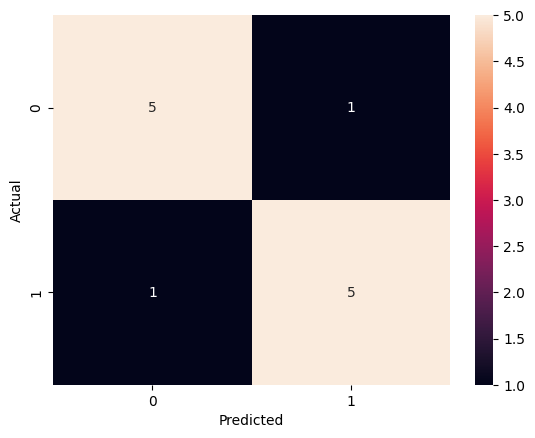

In [18]:

X = credit[['toefl', 'ipk','pengalaman_kerja']]
y = credit['diterima']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

In [48]:
print(tabulate(X_train.head(14),  headers='keys', tablefmt='fancy_grid'))
print(y_pred)

╒════╤═════════╤═══════╤════════════════════╕
│    │   toefl │   ipk │   pengalaman_kerja │
╞════╪═════════╪═══════╪════════════════════╡
│ 37 │     580 │  3.03 │                  1 │
├────┼─────────┼───────┼────────────────────┤
│  2 │     690 │  3.03 │                  3 │
├────┼─────────┼───────┼────────────────────┤
│ 39 │     690 │  3.07 │                  5 │
├────┼─────────┼───────┼────────────────────┤
│ 30 │     640 │  3    │                  1 │
├────┼─────────┼───────┼────────────────────┤
│ 34 │     680 │  3.03 │                  5 │
├────┼─────────┼───────┼────────────────────┤
│ 16 │     580 │  2.07 │                  4 │
├────┼─────────┼───────┼────────────────────┤
│ 36 │     670 │  2.07 │                  2 │
├────┼─────────┼───────┼────────────────────┤
│  8 │     740 │  3.03 │                  5 │
├────┼─────────┼───────┼────────────────────┤
│ 13 │     680 │  3.03 │                  4 │
├────┼─────────┼───────┼────────────────────┤
│  5 │     730 │  3.07 │          

In [39]:
candidate = {'toefl': [590,740,680,610,710],
              'ipk': [2,3.07,3.03,2.03,3],
              'pengalaman_kerja': [3,4,6,1,5]
              }
credit = pd.DataFrame(candidate,columns= ['toefl', 'ipk','pengalaman_kerja',])
y_pred=logistic_regression.predict(credit)
print(tabulate(credit.head(14),  headers='keys', tablefmt='fancy_grid'))
print (y_pred)

╒════╤═════════╤═══════╤════════════════════╕
│    │   toefl │   ipk │   pengalaman_kerja │
╞════╪═════════╪═══════╪════════════════════╡
│  0 │     590 │  2    │                  3 │
├────┼─────────┼───────┼────────────────────┤
│  1 │     740 │  3.07 │                  4 │
├────┼─────────┼───────┼────────────────────┤
│  2 │     680 │  3.03 │                  6 │
├────┼─────────┼───────┼────────────────────┤
│  3 │     610 │  2.03 │                  1 │
├────┼─────────┼───────┼────────────────────┤
│  4 │     710 │  3    │                  5 │
╘════╧═════════╧═══════╧════════════════════╛
[0 1 1 0 1]
